#### Hello my name is Alexander Gonzalez and in this project we will be annalyzing a dataset containing breast cancer patients, and trying to decided if they are diagnosis with a Malignant or Benign tumor.

### Preprocessing Dataset

In [1]:
#Importing some libaries in viewing our data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('data.csv')

In [2]:
df.head()
#Shows the first 5 of the data set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.describe()
#is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df.info()
#method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape
#The amount of rows to columns in the data set

(569, 33)

In [6]:
df.keys()
# all the columns names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.isna().sum()
# we are checking for any null values within our dataset

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

From what we found out, our data set has 33 columns with a total of 569 results within.
We will be removing the last column "Unnamed:32" which contains all null values. We will also not include the "id" and "diagnosis" columns in our taining set since it will have no effect on the classification.

In [8]:
X = df.iloc[:,2:32] #all rows and columns from column 2 to the last one excluding 'Unnamed: 32'
y = df.iloc[:,1] #all rows for column one only which contains the classes of cancer

In [9]:
#Creating correlation of columns in X
corr_matrix = X.corr()
print(corr_matrix["radius_mean"].sort_values(ascending=False))

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0.097317
symmetry_se               -0

<AxesSubplot:>

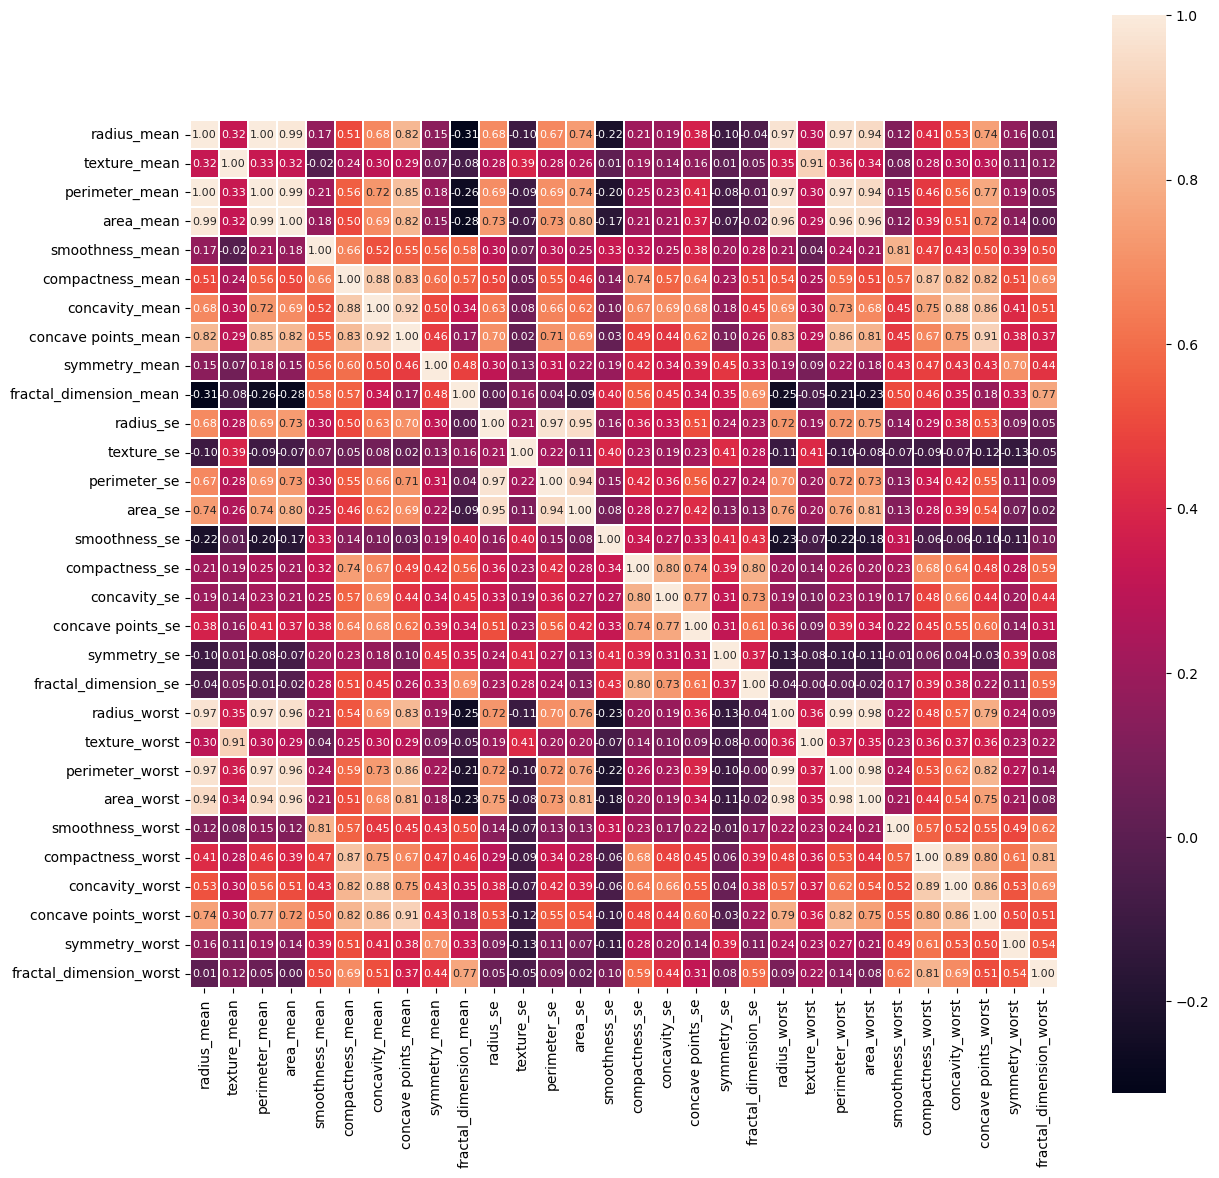

In [10]:
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
             linewidths=0.1, linecolor='white')

In [11]:
from sklearn.preprocessing import LabelEncoder
#We are changing M and B to 0 and 1
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

### Split our dataset

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
#I decided to use test size of .3 and random_state of 42 based off previous labs we done and it seemed to work fine

### Features Scaling

In [13]:
#Using StandardScaler
#StandardScaler removes the mean and scales the data to unit variance.
# I decided to use StandardScaler since it has been commnly used with these type of dataset's.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
#printing the legnth of our features

398
398
171
171


In [15]:
X_train.shape

(398, 30)

In [16]:
X_test.shape

(171, 30)

In [17]:
X_test

array([[-0.48313229, -0.13285829, -0.46029654, ..., -0.19338258,
         0.21048039,  0.22648723],
       [ 1.34906186,  0.51103428,  1.29204314, ...,  1.01968394,
        -0.53341696, -1.00866239],
       [ 0.36358494,  0.0762286 ,  0.38928522, ...,  0.58868486,
        -0.07390369, -0.19132599],
       ...,
       [-1.20977993, -0.2611616 , -1.1400444 , ..., -0.23099704,
        -0.4321955 ,  1.86687566],
       [-0.10083521,  1.26659826,  0.00303674, ...,  0.59965574,
         1.23394176,  1.98690408],
       [-0.36419542, -1.19967661, -0.30118031, ...,  0.66234652,
        -0.39202826,  1.95832589]])

### Building the model

In [18]:
#we are using a tensorflow keras model using Sequential
#4 dense layers with 2 dropout layers
#Relu and sigmoid were the best options to choose for this model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
model=tf.keras.models.Sequential()

#adding input and first hidden layer
#Units = 30, input_shape = 30, with activation= 'relu'
#with a dropout of .2
model.add(tf.keras.layers.Dense(30,input_shape=(30,),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

#adding another layer
#units= 20, activation ='relu'
model.add(tf.keras.layers.Dense(20,activation='relu'))

#adding another layer
#units= 10, activation ='relu'
#with a dropout of .2
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

#adding output layer
#units= 1, activation ='sigmoid'
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1771 (6.92 KB)
Trainable params: 1771 (6.9

### Model Compile (ANN)

In [20]:
#We are using adam as our optimizer
#and for our loss binary_crossentropy Computes the cross-entropy loss between 
#true labels and predicted labels.
# and our metrics is going to be for accuracy Calculates how often predictions 
#equal labels.
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
#we are now going to fit our model to validate
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.8061 - accuracy: 0.3769 - val_loss: 0.7309 - val_accuracy: 0.3743
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.4045 - val_loss: 0.6423 - val_accuracy: 0.4094
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.5000 - val_loss: 0.5844 - val_accuracy: 0.5673
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.6332 - val_loss: 0.5289 - val_accuracy: 0.7544
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7136 - val_loss: 0.4721 - val_accuracy: 0.8947
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.8593 - val_loss: 0.4120 - val_accuracy: 0.9357
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8844 - val_loss: 0.3460 - val_accuracy: 0.9357
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9925 - val_loss: 0.0461 - val_accuracy: 0.9825
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9950 - val_loss: 0.0470 - val_accuracy: 0.9825
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9899 - val_loss: 0.0468 - val_accuracy: 0.9825
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9925 - val_loss: 0.0482 - val_accuracy: 0.9766
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9950 - val_loss: 0.0477 - val_accuracy: 0.9766
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9925 - val_loss: 0.0475 - val_accuracy: 0.9825
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9925 - val_loss: 0.0479 - val_accuracy: 0.9766
Epoch 

### Plotting our Model Loss

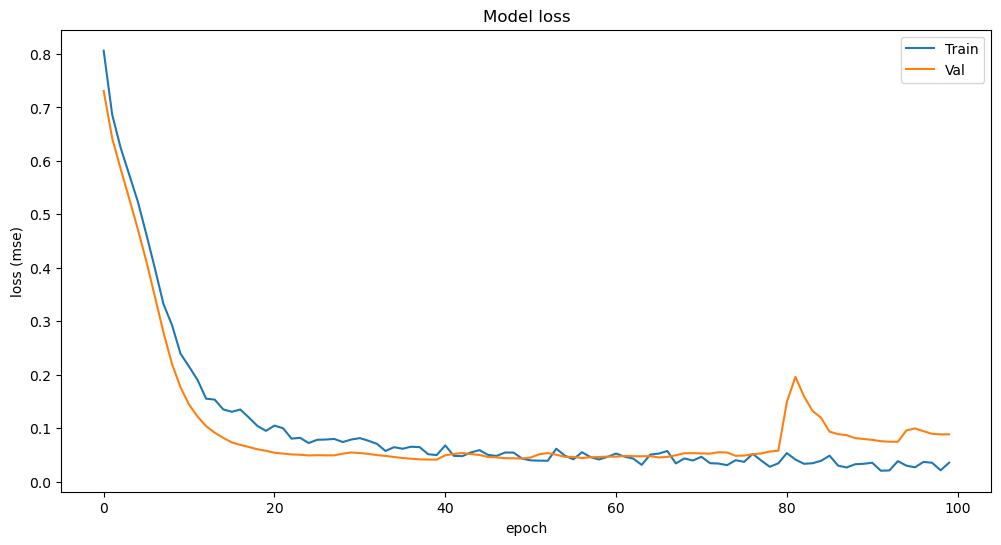

In [22]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

There is a little of overfitting towards the end but it is still very close

### Import keras_tuner as our way to tune the hyper parameters

In [23]:
import keras_tuner as kt

Using TensorFlow backend


Delete any logs from previous runs

In [24]:
import os
import shutil

# shutil module is part of the Python standard library and provides a 
# collection of utility functions for working with files and directories. 

folder_path = "my_dir/intro_to_kt/"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'my_dir/intro_to_kt/' has been deleted.


- We are naming our function model_builder(hp):
- and are adding a sequential model
- Then creating a variable called hp_units which contains hp.Int('units', min_value=4, max_value=24, step=4
- With a dense layer with (units=hp_units, activation='relu')
- Then adding the final layer with one neuron and activation ='sigmoid'
- Then we are compiling the model
- I am using the same model as we used in Lab 4 of ANN with hyperparameters

In [25]:
def model_builder(hp):
    # create model
    model = Sequential()
    
    hp_units = hp.Int('units', min_value=4, max_value=24 , step=4)
    model.add(Dense(units=hp_units, activation='relu'))
    
    ### add the final layer
    model.add(Dense(1,activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

Next we are going to instanitate the tuner to perform hypertuning
- Caling our model_builder
- With the objective of 'val_accuracy'
- In this tuner we are using hyperband tuner
- When using hyperband tuner we must specify the hypermodel
- Max epochs of 10
- Factor of 3

In [26]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy',
                     max_epochs=10, factor=3, 
                     directory='my_dir',
                     project_name='intro_to_kt')

Assuming our goal of training is to minimize the loss, we are going to monitor 'val_loss' with a patience of 5 to stop early.

In [27]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

### Now lets search for optimal values (tune hyperparameters) and display the results

In [28]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.3, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}.
""")

Trial 6 Complete [00h 00m 01s]
val_accuracy: 0.5249999761581421

Best val_accuracy So Far: 0.8666666746139526
Total elapsed time: 00h 00m 05s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 24.



### Train the model

Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [29]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
10/10 [==============================] - 1s 14ms/step - loss: 0.8028 - accuracy: 0.3553 - val_loss: 0.7078 - val_accuracy: 0.4500
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6295 - accuracy: 0.5818 - val_loss: 0.5711 - val_accuracy: 0.6875
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7736 - val_loss: 0.4731 - val_accuracy: 0.7875
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8679 - val_loss: 0.4055 - val_accuracy: 0.8750
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3608 - accuracy: 0.9025 - val_loss: 0.3549 - val_accuracy: 0.9125
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.9214 - val_loss: 0.3159 - val_accuracy: 0.9125
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.9371 - val_loss: 0.2863 - val_accuracy: 0.9125
Epoch 8/50
10/10 [=

### Retrain the model

Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [30]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(X_train, y_train, epochs = best_epoch, validation_split=0.2)

Epoch 1/38
10/10 [==============================] - 1s 14ms/step - loss: 0.6218 - accuracy: 0.6918 - val_loss: 0.4928 - val_accuracy: 0.8125
Epoch 2/38
10/10 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8648 - val_loss: 0.3661 - val_accuracy: 0.9000
Epoch 3/38
10/10 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.9371 - val_loss: 0.2994 - val_accuracy: 0.9125
Epoch 4/38
10/10 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.9560 - val_loss: 0.2586 - val_accuracy: 0.9500
Epoch 5/38
10/10 [==============================] - 0s 4ms/step - loss: 0.2417 - accuracy: 0.9591 - val_loss: 0.2301 - val_accuracy: 0.9500
Epoch 6/38
10/10 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9623 - val_loss: 0.2095 - val_accuracy: 0.9500
Epoch 7/38
10/10 [==============================] - 0s 4ms/step - loss: 0.1952 - accuracy: 0.9623 - val_loss: 0.1933 - val_accuracy: 0.9500
Epoch 8/38
10/10 [=

### Evaluate the hypermodel on the test data

In [31]:
eval_result = hypermodel.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)

13/13 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9774
[test loss, test accuracy]: [0.07398302108049393, 0.9773869514465332]


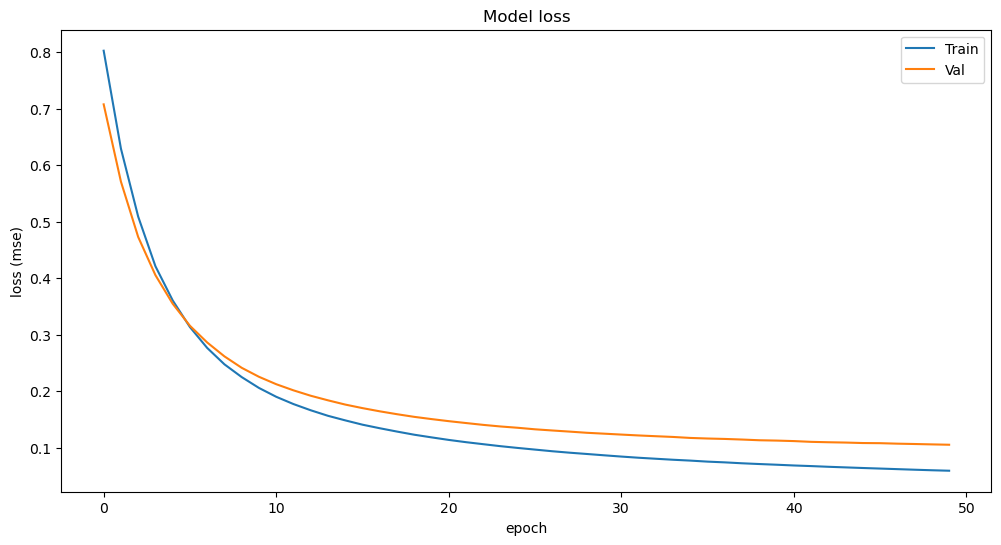

In [32]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

In [33]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

6/6 [==============================] - 0s 801us/step


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#The formula (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]) 
#calculates the accuracy of the model as the ratio of correctly classified samples to the total number of samples.

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[106   2]
 [  1  62]]
Accuracy: 98.24561403508771%


- Our Model has a accuracy of 98.66%
- We do have little overfitting 